TODO TS:

Target: Price Difference [PD]
Condition: Forecast Error [FE]

Preisdifferenz =  intraday - dayahead  
    - PD > 0: preis steigt von dayahead zu intraday
    - PD < 0: preis sinkt von dayahead zu intraday

Forecast error = actual production - predicted production
    - FE > 0: mehr produziert als predicted
    - FE < 0: weniger produziert als predicted



--> PD positive/negative given FE positive/negative [4 combinations]

--> PD high/low given FE high/low [4 combinations]
	--> investigate high-positive vs. high-negative combinations
    --> where to set the threshold?

#####

P(PD|FE) = P(PD, FE) / P(FE)

check both directions ==> consider interpretation
    --> P(A|B)
    --> P(B|A)

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid", {'axes.grid' : True})
import datetime
import warnings
warnings.filterwarnings('ignore')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cRange = ['#475468', '#e7e6e6', '#4b73be', '#df8244', '#a5a5a5', '#f7c143',
          '#20406a', '#deeef8', '#2d6fc0', '#409cd4', '#5ccdd7', '#5ecb9e',
          '#a53218', '#c59933', '#f08a40', '#aa4f30', '#f7bf5d', '#d85733',
          '#728083', '#8babb4', '#7196ad', '#607397', '#8585c2', '#a687c1']
colors = ['#475468', '#e7e6e6', '#4b73be', 
          '#df8244', '#a5a5a5', '#f7c143'] 
cmapOffice = mpl.colors.ListedColormap([cRange[i] for i in range(0, 5)])
cmapBlue = mpl.colors.ListedColormap([cRange[i] for i in range(6, 11)])
cmapRed = mpl.colors.ListedColormap([cRange[i] for i in range(12, 17)])
cmapViolett = mpl.colors.ListedColormap([cRange[i] for i in range(18, 23)])

In [16]:
fullData = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",", index_col="datetime")
fullData.index = pd.to_datetime(fullData.index)

P(PD_posOrNull | FE_pos) [wind] : 0.3608897742363878
P(PD_negative  | FE_pos) [wind] : 0.6391102257636122


P(PD_posOrNull | FE_pos) [solar]: 0.36770007209805333
P(PD_negative  | FE_pos) [solar]: 0.6322999279019467


P(PD_posOrNull | FE_pos) [total]: 0.33107803337843933
P(PD_negative  | FE_pos) [total]: 0.6689219666215607

------------------------------------

P(PD_posOrNull | FE_negative) [wind] : 0.6554483407860673
P(PD_negative  | FE_negative) [wind] : 0.3445516592139327


P(PD_posOrNull | FE_negative) [solar]: 0.5838022165387894
P(PD_negative  | FE_negative) [solar]: 0.4161977834612106


P(PD_posOrNull | FE_negative) [total]: 0.6800461361014994
P(PD_negative  | FE_negative) [total]: 0.31995386389850056

------------------------------------

P(PD_posOrNull | FE_null) [wind] : 0.5
P(PD_negative  | FE_null) [wind] : 0.5


P(PD_posOrNull | FE_null) [solar]: 0.5163650878126663
P(PD_negative  | FE_null) [solar]: 0.4836349121873337


P(PD_posOrNull | FE_null) [total]: 0.75
P(PD_negative  

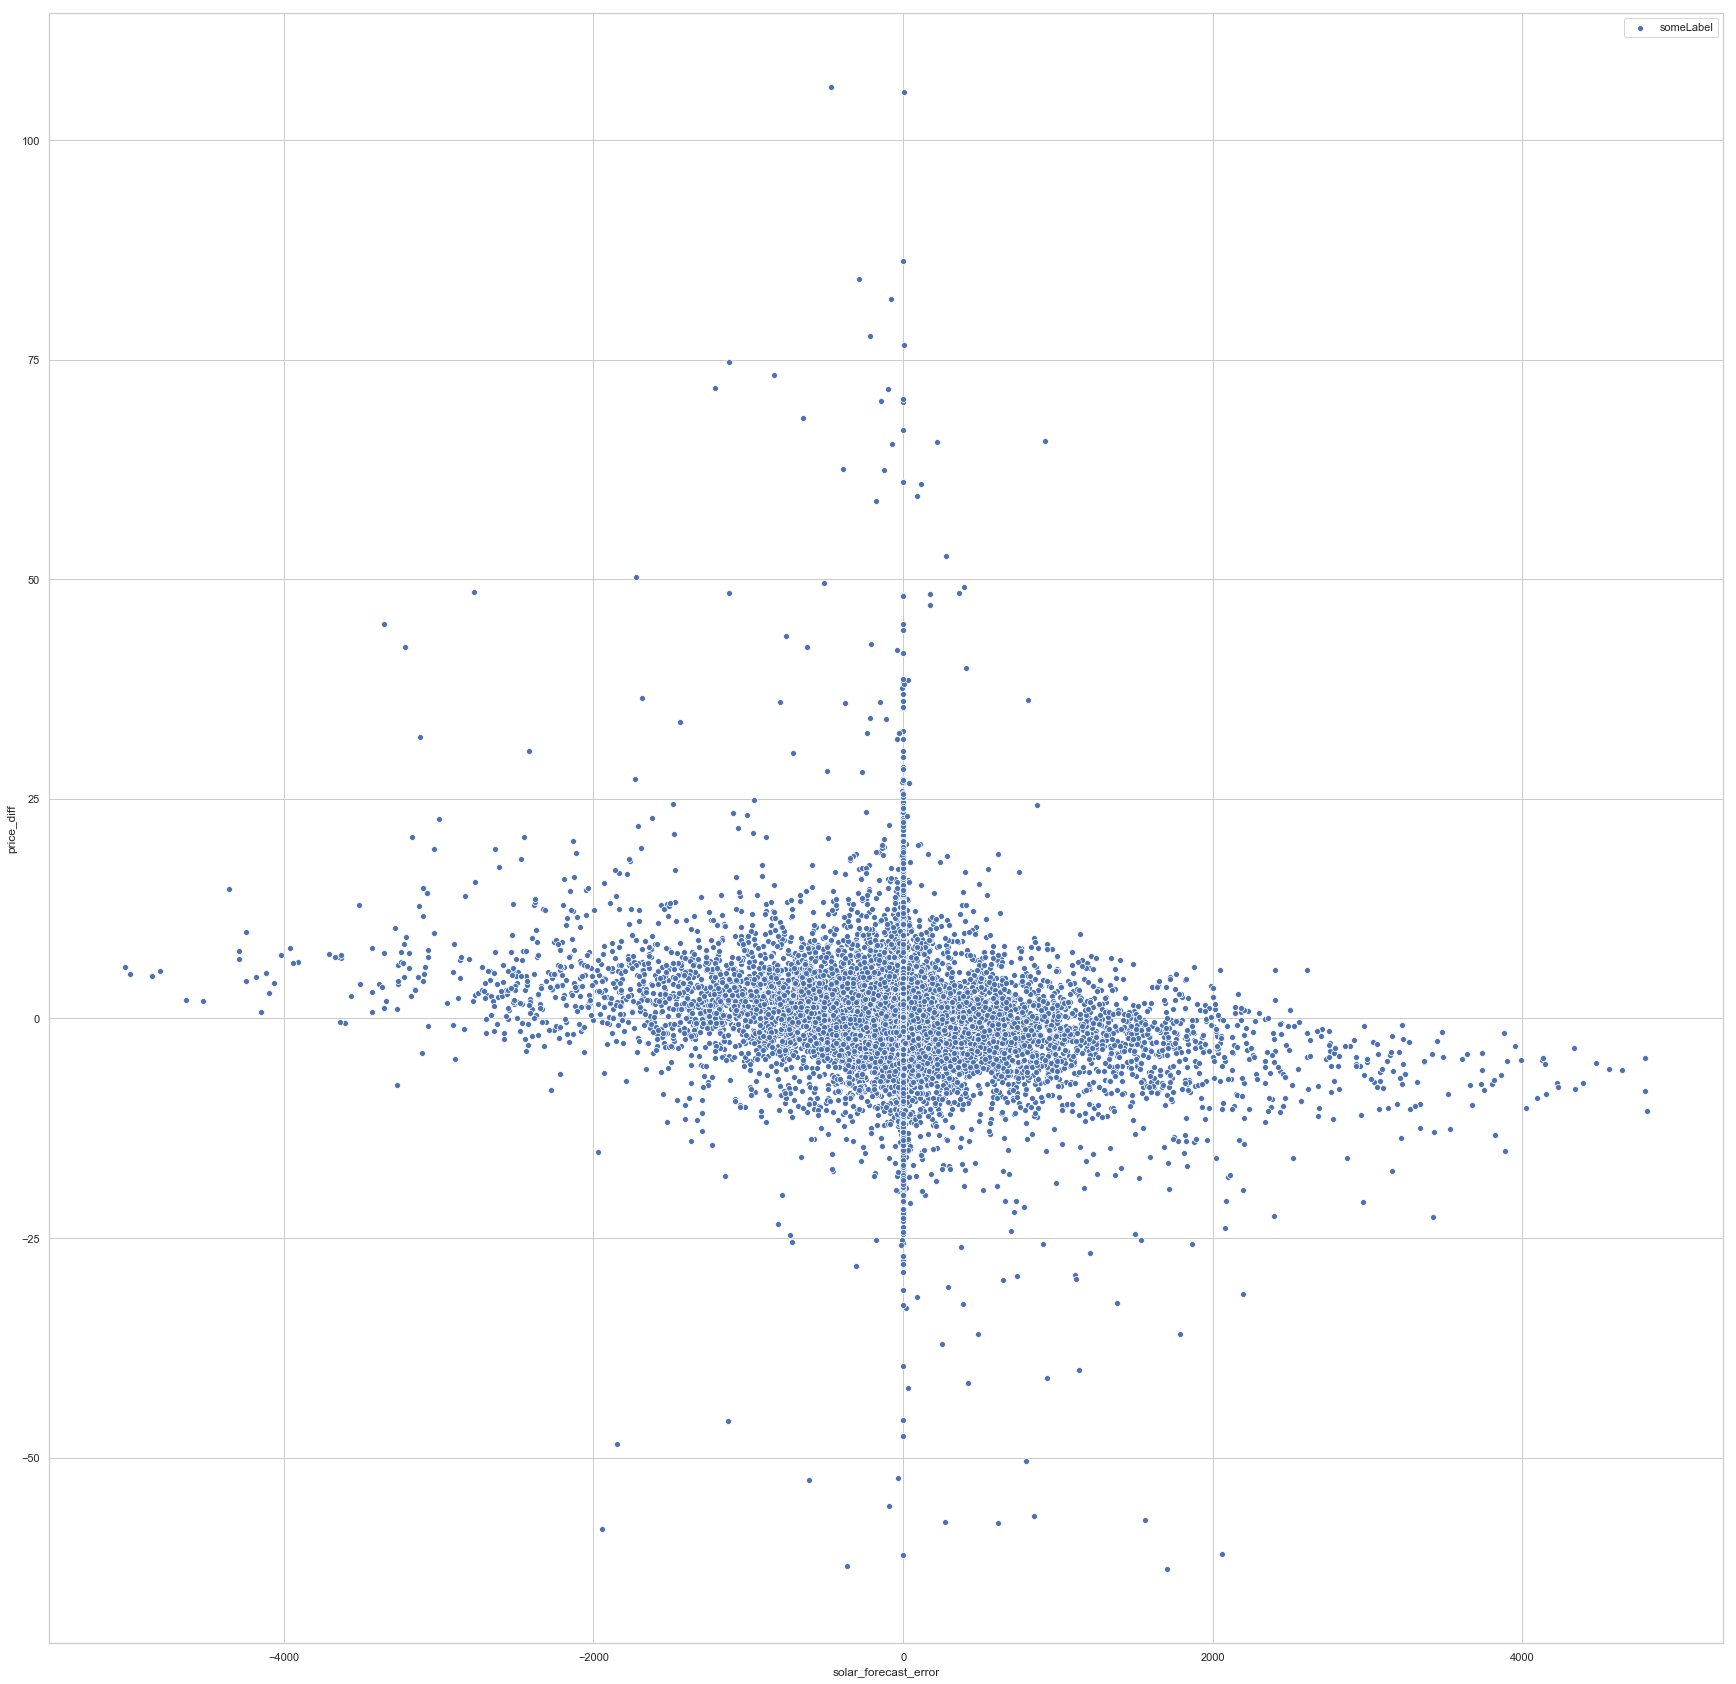

In [56]:
# label data > 0 : 1; < 0 : 0; == 0 : 2 otherwise
fullData["posNegIndicator_wind"] = fullData["wind_forecast_error"].map(lambda x: 1 if x > 0 else 0 if x < 0 else 2)
fullData["posNegIndicator_solar"] = fullData["solar_forecast_error"].map(lambda x: 1 if x > 0 else 0 if x < 0 else 2)
fullData["posNegIndicator_total"] = fullData["forecast_error"].map(lambda x: 1 if x > 0 else 0 if x < 0 else 2)
fullData["posNegIndicator_priceDiff"] = fullData["price_diff"].map(lambda x: 1 if x > 0 else 0 if x < 0 else 2)

# tempWindData = fullData.copy(deep=True)
# tempWindData = tempWindData[((tempWindData.solar_generation_actual != 0) & (tempWindData.solar_generation_forecast != 0))]
# tempWindData["isPositiveOrNull_solar"] = tempWindData["solar_forecast_error"].map(lambda x: 1 if x >= 0 else 0)

# select conditional data for wind/solar/total forecastError isPositive
data_isPositive_wind = fullData[(fullData.posNegIndicator_wind == 1)]
data_isPositive_solar = fullData[(fullData.posNegIndicator_solar == 1)]
data_isPositive_total = fullData[(fullData.posNegIndicator_total == 1)]

# select conditional data for wind/solar/total forecastError isNegative
data_isNegative_wind = fullData[(fullData.posNegIndicator_wind == 0)]
data_isNegative_solar = fullData[(fullData.posNegIndicator_solar == 0)]
data_isNegative_total = fullData[(fullData.posNegIndicator_total == 0)]

# select conditional data for wind/solar/total forecastError isNull
data_isNull_wind = fullData[(fullData.posNegIndicator_wind == 2)]
data_isNull_solar = fullData[(fullData.posNegIndicator_solar == 2)]
data_isNull_total = fullData[(fullData.posNegIndicator_total == 2)]

# compute conditional probabilities for forecastError isPositive
data_isPositive_wind = data_isPositive_wind["posNegIndicator_priceDiff"]
data_isPositive_solar = data_isPositive_solar["posNegIndicator_priceDiff"]
data_isPositive_total = data_isPositive_total["posNegIndicator_priceDiff"]
condProb_PD_isPositiveOrNull_on_FE_isPositive_wind = data_isPositive_wind[(data_isPositive_wind != 0)].sum() / data_isPositive_wind.count()
condProb_PD_isPositiveOrNull_on_FE_isPositive_solar = data_isPositive_solar[(data_isPositive_solar != 0)].sum() / data_isPositive_solar.count()
condProb_PD_isPositiveOrNull_on_FE_isPositive_total = data_isPositive_total[(data_isPositive_total != 0)].sum() / data_isPositive_total.count()

# compute conditional probabilities for forecastError isNegative
data_isNegative_wind = data_isNegative_wind["posNegIndicator_priceDiff"]
data_isNegative_solar = data_isNegative_solar["posNegIndicator_priceDiff"]
data_isNegative_total = data_isNegative_total["posNegIndicator_priceDiff"]
condProb_PD_isPositiveOrNull_on_FE_isNegative_wind = data_isNegative_wind[(data_isNegative_wind != 0)].sum() / data_isNegative_wind.count()
condProb_PD_isPositiveOrNull_on_FE_isNegative_solar = data_isNegative_solar[(data_isNegative_solar != 0)].sum() / data_isNegative_solar.count()
condProb_PD_isPositiveOrNull_on_FE_isNegative_total = data_isNegative_total[(data_isNegative_total != 0)].sum() / data_isNegative_total.count()

# compute conditional probabilities for forecastError isNull
data_isNull_wind = data_isNull_wind["posNegIndicator_priceDiff"]
data_isNull_solar = data_isNull_solar["posNegIndicator_priceDiff"]
data_isNull_total = data_isNull_total["posNegIndicator_priceDiff"]
condProb_PD_isPositiveOrNull_on_FE_isNull_wind = data_isNull_wind[(data_isNull_wind != 0)].sum() / data_isNull_wind.count()
condProb_PD_isPositiveOrNull_on_FE_isNull_solar = data_isNull_solar[(data_isNull_solar != 0)].sum() / data_isNull_solar.count()
condProb_PD_isPositiveOrNull_on_FE_isNull_total = data_isNull_total[(data_isNull_total != 0)].sum() / data_isNull_total.count()

# result output
print("P(PD_posOrNull | FE_pos) [wind] : " + str(condProb_PD_isPositiveOrNull_on_FE_isPositive_wind))
print("P(PD_negative  | FE_pos) [wind] : " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isPositive_wind))
print("\n")
print("P(PD_posOrNull | FE_pos) [solar]: " + str(condProb_PD_isPositiveOrNull_on_FE_isPositive_solar))
print("P(PD_negative  | FE_pos) [solar]: " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isPositive_solar))
print("\n")
print("P(PD_posOrNull | FE_pos) [total]: " + str(condProb_PD_isPositiveOrNull_on_FE_isPositive_total))
print("P(PD_negative  | FE_pos) [total]: " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isPositive_total))

print("\n------------------------------------\n")

print("P(PD_posOrNull | FE_negative) [wind] : " + str(condProb_PD_isPositiveOrNull_on_FE_isNegative_wind))
print("P(PD_negative  | FE_negative) [wind] : " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isNegative_wind))
print("\n")
print("P(PD_posOrNull | FE_negative) [solar]: " + str(condProb_PD_isPositiveOrNull_on_FE_isNegative_solar))
print("P(PD_negative  | FE_negative) [solar]: " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isNegative_solar))
print("\n")
print("P(PD_posOrNull | FE_negative) [total]: " + str(condProb_PD_isPositiveOrNull_on_FE_isNegative_total))
print("P(PD_negative  | FE_negative) [total]: " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isNegative_total))

print("\n------------------------------------\n")

print("P(PD_posOrNull | FE_null) [wind] : " + str(condProb_PD_isPositiveOrNull_on_FE_isNull_wind))
print("P(PD_negative  | FE_null) [wind] : " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isNull_wind))
print("\n")
print("P(PD_posOrNull | FE_null) [solar]: " + str(condProb_PD_isPositiveOrNull_on_FE_isNull_solar))
print("P(PD_negative  | FE_null) [solar]: " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isNull_solar))
print("\n")
print("P(PD_posOrNull | FE_null) [total]: " + str(condProb_PD_isPositiveOrNull_on_FE_isNull_total))
print("P(PD_negative  | FE_null) [total]: " + str(1 - condProb_PD_isPositiveOrNull_on_FE_isNull_total))

##### second try: indirect computation
# print("\n")
# conditionalData_priceDiff = fullData[(fullData.isPositiveOrNull_priceDiff == 1)]

# condProb_FE_on_PD_wind = conditionalData_priceDiff["isPositiveOrNull_wind"].sum() / conditionalData_priceDiff["isPositiveOrNull_wind"].count()
# condProb_FE_on_PD_solar = conditionalData_priceDiff["isPositiveOrNull_solar"].sum() / conditionalData_priceDiff["isPositiveOrNull_solar"].count()

# prob_positiveOrNull_wind = fullData["isPositiveOrNull_wind"].sum() / fullData["isPositiveOrNull_wind"].count()
# prob_positiveOrNull_solar = fullData["isPositiveOrNull_solar"].sum() / fullData["isPositiveOrNull_solar"].count()
# prob_positiveOrNull_priceDiff = fullData["isPositiveOrNull_priceDiff"].sum() / fullData["isPositiveOrNull_priceDiff"].count()

# secondTry_condProb_PD_on_FE_wind = (condProb_FE_on_PD_wind * prob_positiveOrNull_priceDiff) / prob_positiveOrNull_wind
# secondTry_condProb_PD_on_FE_solar = (condProb_FE_on_PD_solar * prob_positiveOrNull_priceDiff) / prob_positiveOrNull_solar

# print("Second try:")
# print("P(PD|FE) [wind] : " + str(secondTry_condProb_PD_on_FE_wind))
# print("P(PD|FE) [solar]: " + str(secondTry_condProb_PD_on_FE_solar))


fig, (ax1) = plt.subplots(1, 1, figsize=(30, 30), sharex=False)

sns.scatterplot(x="solar_forecast_error", y="price_diff", data=fullData, ax=ax1, label="someLabel", ci=None)

# ax1.set_xticks(np.arange(720, step=30.5))
# ax1.set_xticklabels(2*[month for month in months]);

# Expectations

Expectation: P(PD_negative  | FE_pos) > P(PD_posOrNull  | FE_pos)
    - since increased supply should lead to lower prices in intraday
Expectation: P(PD_posOrNull | FE_negative) > P(PD_negative | FE_negative)
    - since demand shortage should lead to higher prices in intraday
Expectation P(PD_posOrNull | FE_null) ?????? P(PD_negative | FE_null)
    - ??? What do we expect ????
    - the probabilities suggest that we should expect them to be roughly equal (i.e 50/50)

# Conclusion

Bot expectations are met with the exception of P(FE | FE_negative) for solar power where the probability of increasing prices in cases of demand shortages is lower than the probability of decreasing prices in the case of demand shortages.

Total
    - Bot expectations are met with an at least 15% deviation from the random distribution of 50% (up and down)
Wind:
    - Both expectations are met with an at least 10% deviation from the random distribution of 50% (up and down)
Solar
    - The first expectation is met with a deviation of 3% from the random distribution.
    - The second expectation is NOT met and deviates 9.7% into the other direction.